In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Since there are no missing values, we can move forward with the analysis.

In [10]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score']

In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

## Gender Distribution

/tmp/ipython-input-12-918286453.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df , x='Gender' , palette = 'pastel')


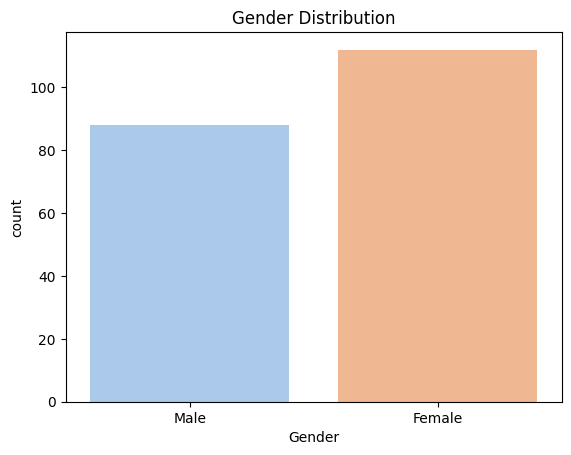

In [12]:
import seaborn as sns
sns.countplot(data = df , x='Gender' , palette = 'pastel')
plt.title("Gender Distribution")
plt.show()

## Age Distribution

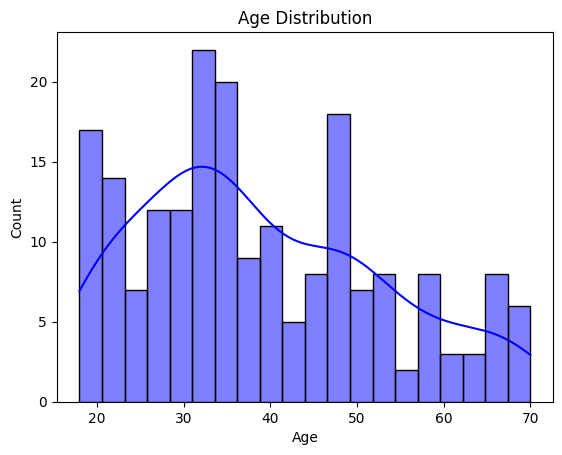

In [17]:
sns.histplot(df['Age'] , kde = True , bins = 20 , color = 'blue')
plt.title("Age Distribution")
plt.show()

## Income v/s Spending

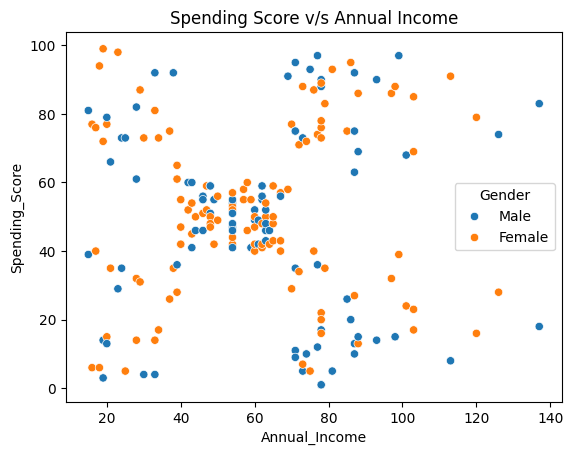

In [18]:
sns.scatterplot(data = df , x = 'Annual_Income' , y = 'Spending_Score' , hue = 'Gender')
plt.title("Spending Score v/s Annual Income")
plt.show()

# Preparing for Clustering

In [21]:
X = df[['Age' , 'Annual_Income' , 'Spending_Score']]
scaler = StandardScaler()

In [22]:
X_scaled = scaler.fit_transform(X)

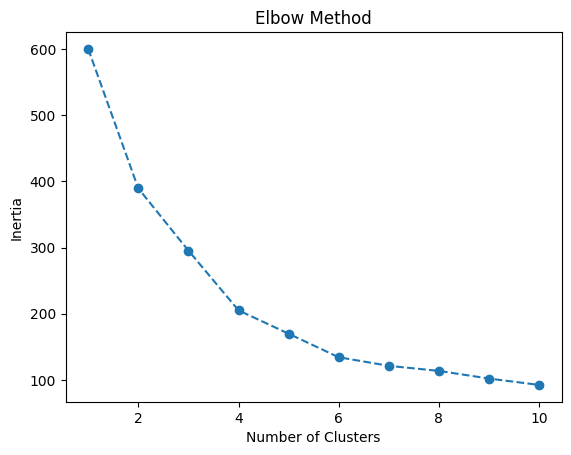

In [28]:
# Elbow Method

inertia = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k , random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

plt.plot(range(1,11) , inertia , marker='o' , linestyle='--')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

## Customer Segmentation

In [30]:
# K-Means Clustering
kmeans = KMeans(n_clusters=5 , random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [31]:
# PCA for 2D Plotting
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df['PCA1'] = pca_components[:,0]
df['PCA2'] = pca_components[:,1]

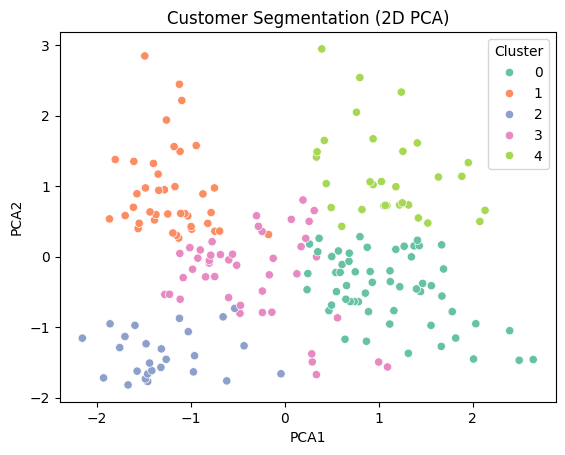

In [34]:
sns.scatterplot(data=df , x='PCA1' , y='PCA2' , hue='Cluster' , palette='Set2')
plt.title("Customer Segmentation (2D PCA)")
plt.show()

In [36]:
# Cluster Profiling
cluster_summary = df.groupby('Cluster')[['Age', 'Annual_Income', 'Spending_Score']].mean()
print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
               Age  Annual_Income  Spending_Score
Cluster                                          
0        55.275862      47.620690       41.706897
1        32.875000      86.100000       81.525000
2        25.769231      26.115385       74.846154
3        26.733333      54.311111       40.911111
4        44.387097      89.774194       18.483871


* **Box 0 (The Savvy Seniors)**: These are our older customers, typically in their mid-50s. They have a moderate income and tend to spend a moderate amount in the mall. They are probably looking for good value.

* **Box 1 (The Spendy Stars)**: This is a younger to middle-aged group (around 30s) * who make a good amount of money and are also our biggest spenders! These are likely our most valuable customers.

* **Box 2 (The Young Enthusiasts)**: These are young customers (around 25) who don't make a lot of money, but they love to spend! They might be impulse buyers or enjoy trendy items.

* **Box 3 (The Steady Savers)**: Similar in age to the Spendy Stars (around 26), this group has a moderate income and spends a moderate amount. They are consistent customers but not big spenders.

* **Box 4 (The High-Income Homebodies)**: This group is middle-aged (around 44) and makes a lot of money, but they don't spend much in our mall. We might need to figure out why they aren't spending more.

# Modelling

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix

In [45]:
features = df[['Age' , 'Annual_Income' , 'Spending_Score']]
target = df['Cluster']
X_train , X_test , y_train , y_test = train_test_split(features , target , test_size=0.2 , random_state=42)

In [46]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

In [47]:
print("\n Classification Report :")
print(classification_report(y_test , y_pred))


 Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        10

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [48]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[10  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 10]]


## Conclusion:

Using K-Means clustering, we segmented mall customers into 5 distinct groups based on Age, Annual Income, and Spending Score.

- Some clusters represented high-income, high-spending individuals — ideal for premium services.
- Others showed moderate income but high spending tendencies — a potential target for loyalty programs.
- A few clusters included low-income and low-spending customers, which may need budget-focused marketing.

This segmentation enables the mall or retail businesses to design targeted marketing strategies and personalized offers for each segment to improve customer satisfaction and business efficiency.



In [50]:
import pickle

with open("rf_model.pkl", "wb") as f:
  pickle.dump(model, f)
with open("scaler.pkl", "wb") as f:
  pickle.dump(scaler, f)